# 신경망 학습

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 교차 엔트로피

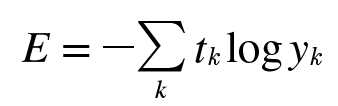

In [2]:
from IPython.display import Image
Image('./deep_learning_images/e 4.2.png', width=200)

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 0.0000001
    return -np.sum(t*np.log(y+delta)) 

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 : 2 (one-hot encoding)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 2에 가깝게 예측

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
# 입력이 ont-hot enc 되어 있으면 정답의 1값만 적용
-np.log(0.6+ 1e-7)

0.510825457099338

In [10]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 : 2 (one-hot encoding)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 7에 가깝게 예측

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [ ]:
# 예측을 잘못할 수록 cross entropy의 값은 크다

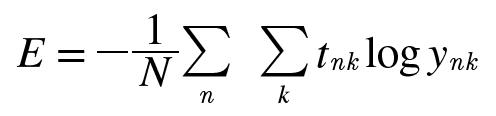

In [16]:
Image('./deep_learning_images/e 4.3.png', width=200)

In [11]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 0.0000001
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+delta))/batch_size 

In [12]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 미분

In [13]:
Image('./deep_learning_images/e 4.5.png', width=200)

In [14]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [15]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

In [16]:
# 중앙차분에 의한 수치미분
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)            

In [17]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

a = numerical_diff(function_1, 5) # 약 0.2
b = function_1(5) - (a*5)
y2 = a * x + b

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y2)

## 편미분

In [18]:
Image('./deep_learning_images/e 4.6.png', width=200)

In [19]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [23]:
# 그레디언트 (편미분 벡터)
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grads = np.zeros_like(x)
    
    for idx in range(x.size): # x[0], x[1], ....
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
    
        grads[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        
    return grads

In [24]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

## 경사하강법

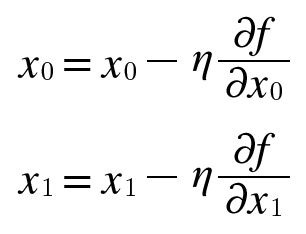

In [53]:
Image('./deep_learning_images/e 4.7.png', width=150)

In [25]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x) # grad <= 편미분 벡터
        x = x - (lr * grad)
    return x

In [ ]:
# init_x : 초기 랜덤한 weight 벡터 (w1, w2....)
# function_2 : loss function
# gradient_descent : weight의 기울기(미분)를 단서로 loss의 최소값을 찾아가는 과정 

In [29]:
init_x = np.array([3.0, 4.0]) # 산의 가장 높은 위치에 있는 상태 (loss가 가장 큰 상태)
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

array([6.11110793e-10, 8.14814391e-10])

## 신경망에서의 기울기

- (참고) np.nditer 사용법

In [21]:
import numpy as np
x=np.array([[1,2,3],[4,5,6]])
it=np.nditer(x,flags=['multi_index'],op_flags=['readwrite'])
while not it.finished:
    print(it.multi_index) #(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)
    print(x[it.multi_index]) # 1,2,3,4,5,6
    it.iternext()

(0, 0)
1
(0, 1)
2
(0, 2)
3
(1, 0)
4
(1, 1)
5
(1, 2)
6


In [30]:
# 신경망에서 사용할 W(Matrix 형태)의 편미분 행렬을 구하는 함수
# 그레디언트 (편미분 벡터)

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grads = np.zeros_like(x)
    
    it = np.nditer(x, flags=["multi_index"], op_flags=["readwrite"])
        
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
    
        grads[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()
        
    return grads

In [31]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [33]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss    

In [34]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
f = lambda w : net.loss(x, t) # f : Loss 함수

dw = numerical_gradient(f, net.W) # net.W shape: (2, 3) => dw shape : (2, 3)

In [35]:
dw # net.W를 미분한 기울기 벡터

array([[ 0.413189  ,  0.12388643, -0.53707543],
       [ 0.6197835 ,  0.18582965, -0.80561315]])